<a href="https://colab.research.google.com/github/Arpit-Babbar/arpit_practise/blob/main/back_lw/dissiptation_dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The amplification factor in backward Lax-Wendroff is 
$$\epsilon(k,\sigma) = \left(1 + \frac{\sigma^2}{2} - \frac{3}{2}\sigma\right) - \left(\sigma^2 - 2 \sigma\right)e^{-\dot{\iota}kh} + \left(\frac{\sigma^2}{2} - \frac{\sigma}{2}\right)e^{-2\dot{\iota}kh} $$
We then put $-kh = \theta$ and define
$$\tilde{\epsilon}(\theta,\sigma) = \left(1 + \frac{\sigma^2}{2} - \frac{3}{2}\sigma\right) - \left(\sigma^2 - 2 \sigma\right)e^{\dot{\iota}\theta} + \left(\frac{\sigma^2}{2} - \frac{\sigma}{2}\right)e^{2\dot{\iota}\theta}$$
We'd then find $\sigma$ for which $$|\tilde{\epsilon}(\sigma,\theta)| \le 1, \quad \forall \theta \in [0,2\pi]$$

The amplifaction factor in central Lax-Wendroff is 

$$\gamma(k,\sigma) = \left(-\frac{\sigma}{2} +\frac{\sigma^2}{2}\right)e^{\dot{\iota}kh} + (1 -\sigma^2) + \left(\frac{\sigma}{2} + \frac{\sigma^2}{2} \right) e^{-\dot{\iota}kh}$$

Again, defining $$\tilde{\gamma}(\theta,\sigma) =\left(-\frac{\sigma}{2} +\frac{\sigma^2}{2}\right)e^{\dot{\iota}\theta} + (1 -\sigma^2) + \left(\frac{\sigma}{2} + \frac{\sigma^2}{2} \right) e^{-\dot{\iota}\theta}$$

We'd find $\sigma$ for which 
We'd then find $\sigma$ for which $$|\tilde{\gamma}(\sigma,\theta)| \le 1, \quad \forall \theta \in [0,2\pi]$$


In [90]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt

In [78]:
#Defining amplification factor functions for both schemes
def amp_back(theta,sigma):
  amp = (1.0 + sigma**2/2.0 - 1.5 * sigma) - (sigma**2 - 2.0*sigma)*exp(1.0j*theta) + (sigma**2/2.0 - sigma/2.0) * exp(2.0j*theta)
  return amp
def amp_cent(theta,sigma):
  amp = (-sigma/2.0 + sigma**2/2.0)*exp(1j*theta) + (1.0 - sigma**2) + (sigma/2.0 + sigma**2/2.0) * exp(-1j * theta)
  return amp    

In [99]:
theta_grid = np.linspace(0.0,2.0*np.pi, 100)
sigma_set = np.linspace(0.001,2.001,5)

In [100]:
for sigma in sigma_set:
    amplification = 0.0
    amplification_central = 0.0
    for theta in theta_grid:
        amplification = max(amplification,np.abs(amp_back(theta,sigma)))
        amplification_central = max(amplification_central,np.abs(amp_cent(theta,sigma)))
    print("Amplification factor in backward lw for sigma = ", sigma, " is ", amplification)
    print("Amplification factor in central lw for sigma = ", sigma, " is ", amplification_central)

Amplification factor in backward lw for sigma =  0.001  is  1.0
Amplification factor in central lw for sigma =  0.001  is  1.0
Amplification factor in backward lw for sigma =  0.501  is  0.9999999999999999
Amplification factor in central lw for sigma =  0.501  is  0.9999999999999999
Amplification factor in backward lw for sigma =  1.001  is  1.0
Amplification factor in central lw for sigma =  1.001  is  1.0039999894293137
Amplification factor in backward lw for sigma =  1.501  is  0.9999999999999996
Amplification factor in central lw for sigma =  1.501  is  3.505191245988973
Amplification factor in backward lw for sigma =  2.001  is  1.003999989429314
Amplification factor in central lw for sigma =  2.001  is  7.006273808633761


Thus, cfl for central Lax-Wendroff is 1.0, while for backward Lax-Wendroff it is 2.0

#Dissipation error comparison

Fixing a $\sigma$ for our scheme, $\gamma_k = \epsilon(k,\sigma)$, which we can compute in our code as 

```
amp(sigma,-kh)
```
Recall that $\gamma_k$ satisfies $u_j^n = \sum c_k e^{ikx_j} \implies u_j^{n+1} = \sum \gamma_k c_k e^{ikx_j}$. The solutions of our original PDE are of the form $u_j^n = \sum f(x_j)g_k^ne^{-ikx_k}$ such that $|g_k| = 1$, i.e., they have no dissipation, we would also like this from our scheme.

So, we'd like $|\gamma_k|$ to be close to 1. 

Thus, to check which scheme has lesser dispersion, we plot the two amplification factors.

In [102]:
sigma = 0.5
h = 0.1
sup = 0.0
back = [] #Stores the amplification factors for backward lw
cent = [] #Stores the amplification factors for central lw
phase_angles = []
for i in range(-30,30):
  i = float(i)
  phase_angles.append(i*h)
  back.append(np.abs(amp_back(-i*h,sigma)))
  cent.append(np.abs(amp_cent(-i*h,sigma)))

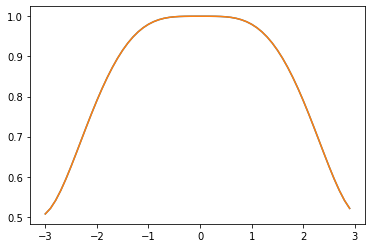

In [105]:
plt.plot(phase_angles,back)
plt.plot(phase_angles,cent)
plt.show()

Both the amplification factors stay together, so both the schemes have the same amount of dissipation.

#Dispersion
